# LoanTap

- Problem Statement:

    LoanTap aims to leverage a dataset comprising diverse customer attributes to develop a robust predictive model capable of accurately determining the credit rating of customers.This predictive model holds immense value for LoanTap and other financial institutions as it allows them to mitigate the risk of defaults and make precise evaluations of customer creditworthiness.By utilizing this model, LoanTap can make informed decisions concerning credit approvals, loan terms, and interest rates, thus enhancing their ability to offer appropriate financial solutions to customers while maintaining a secure lending portfolio.

In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import scipy.stats as stats

from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [201]:
df = pd.read_csv("Credit.csv")
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [202]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [204]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [205]:
df.describe(include=object)

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


Univariate Analysis

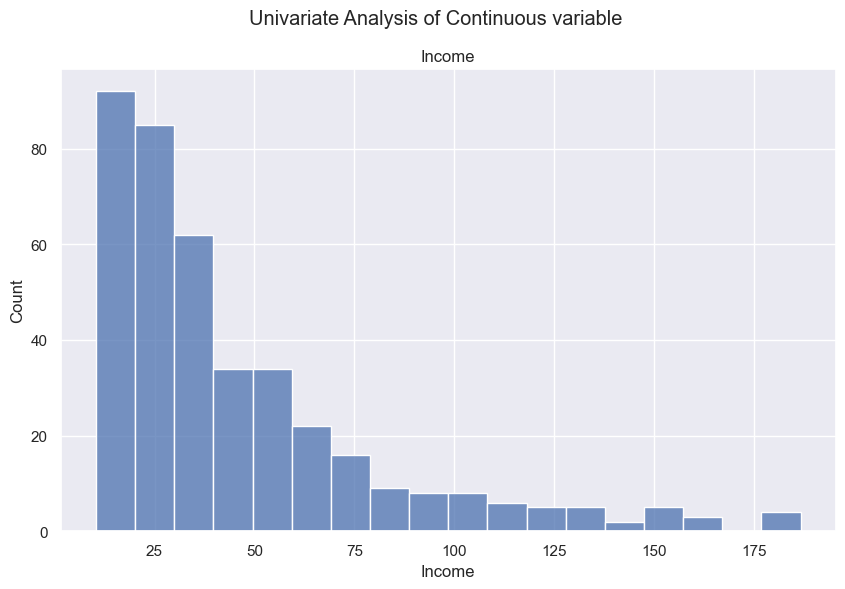

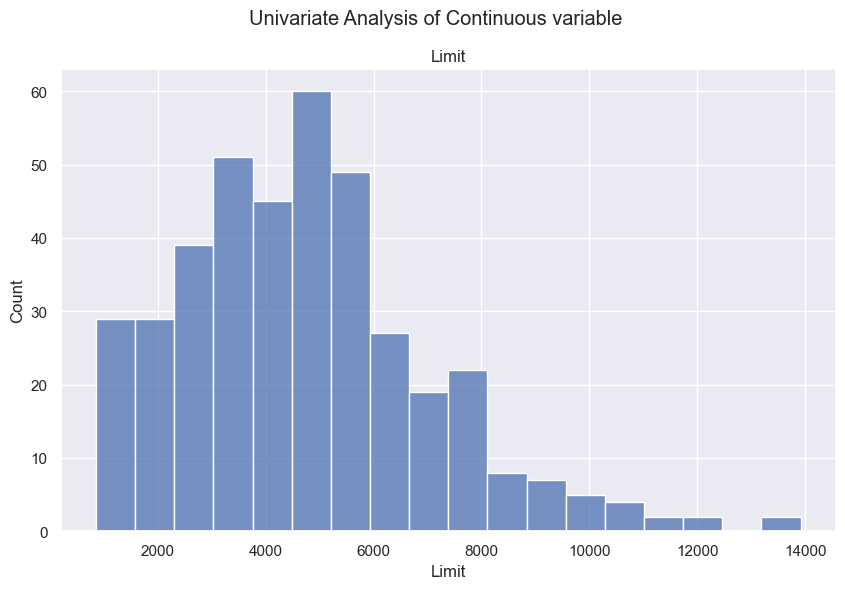

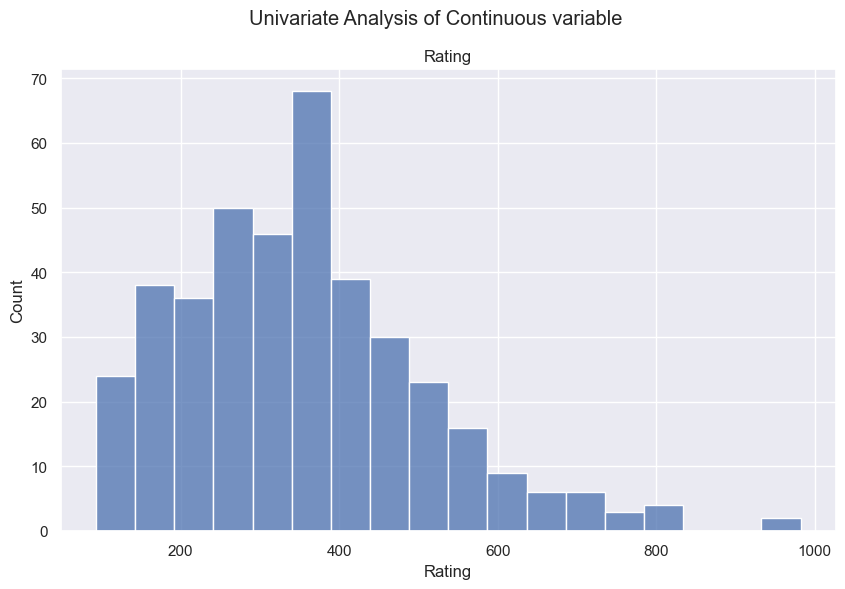

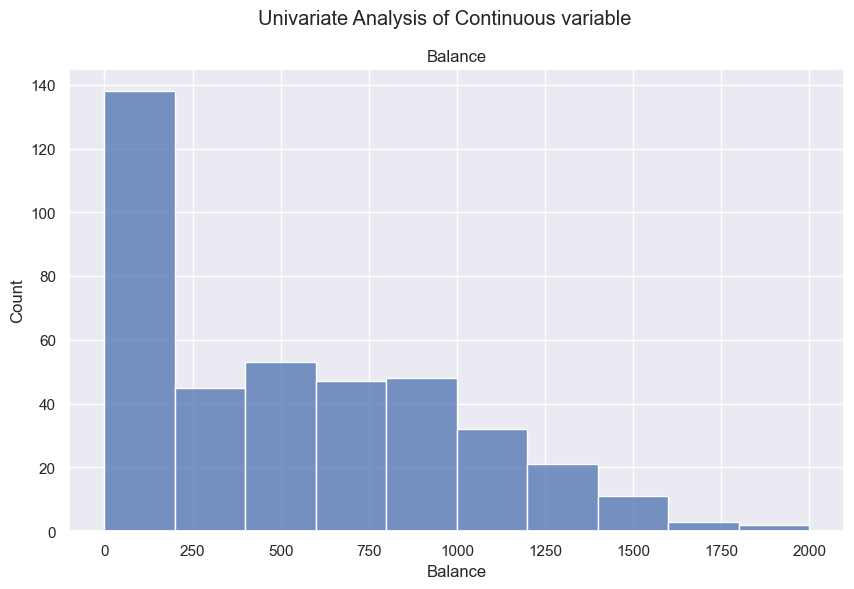

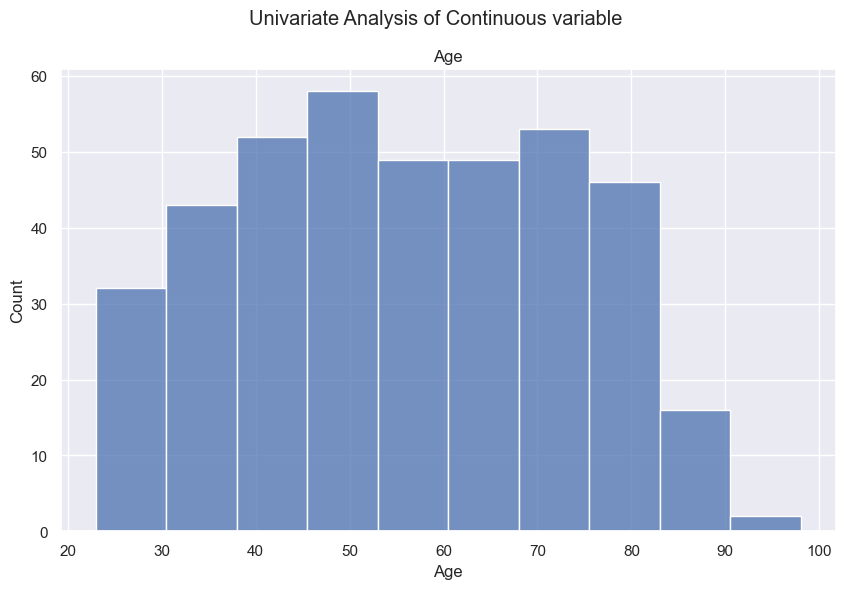

In [206]:
continuos_variable = ["Income","Limit","Rating","Balance","Age"]

for i in continuos_variable:
    fig, axes = plt.subplots(1,1, figsize=(10,6))
    fig.suptitle("Univariate Analysis of Continuous variable")
    sns.histplot(ax = axes,data=df,x=i)
    axes.set_title(f"{i}")
    

In [207]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

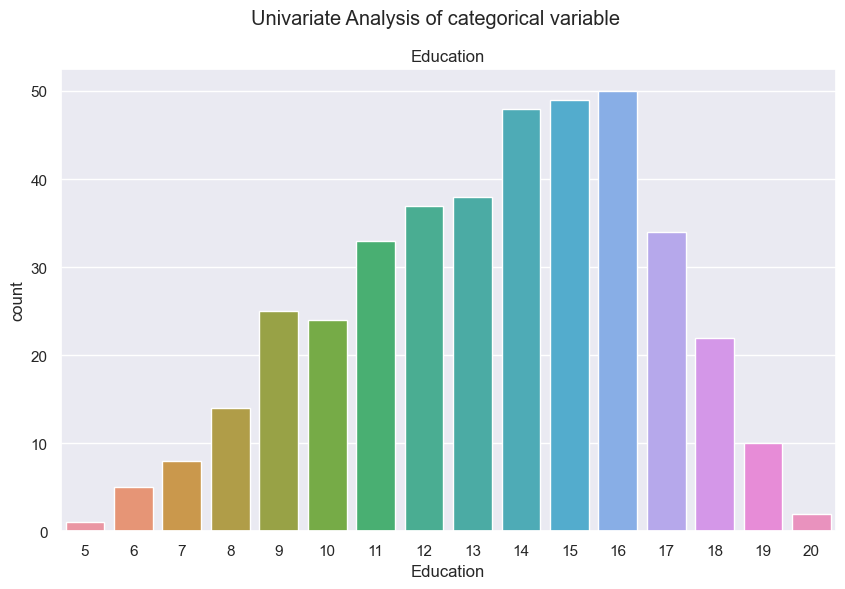

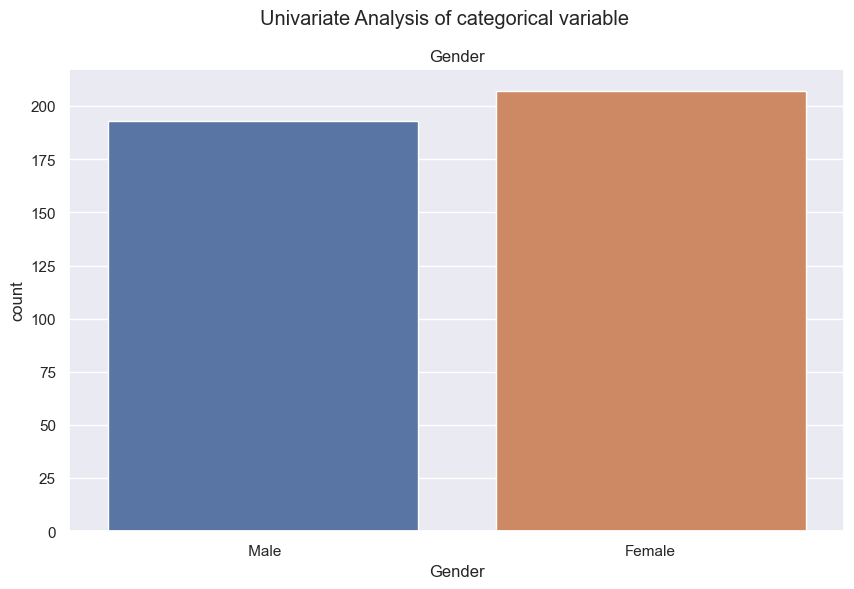

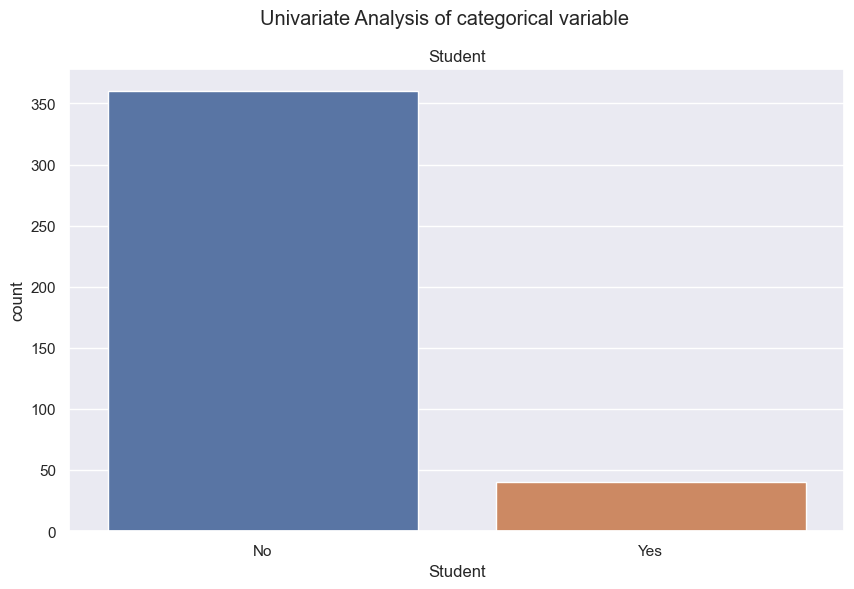

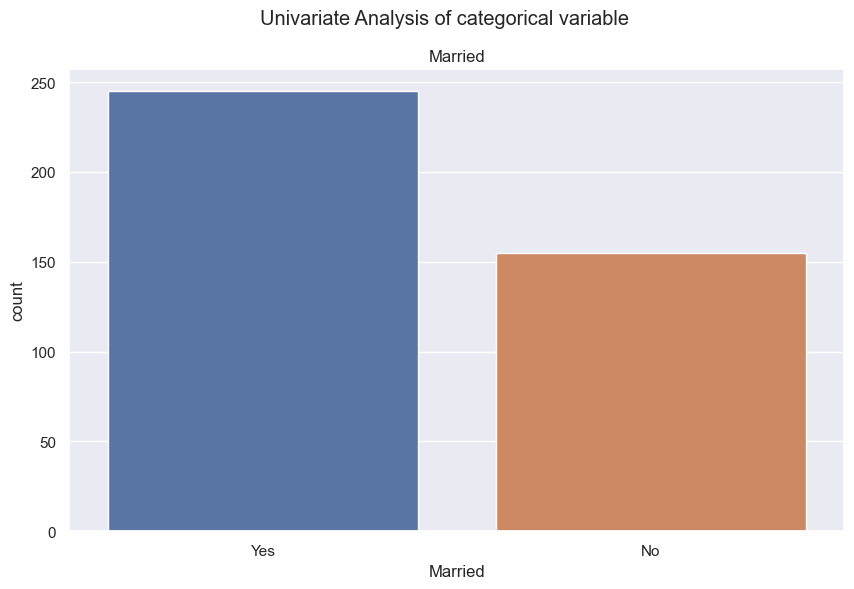

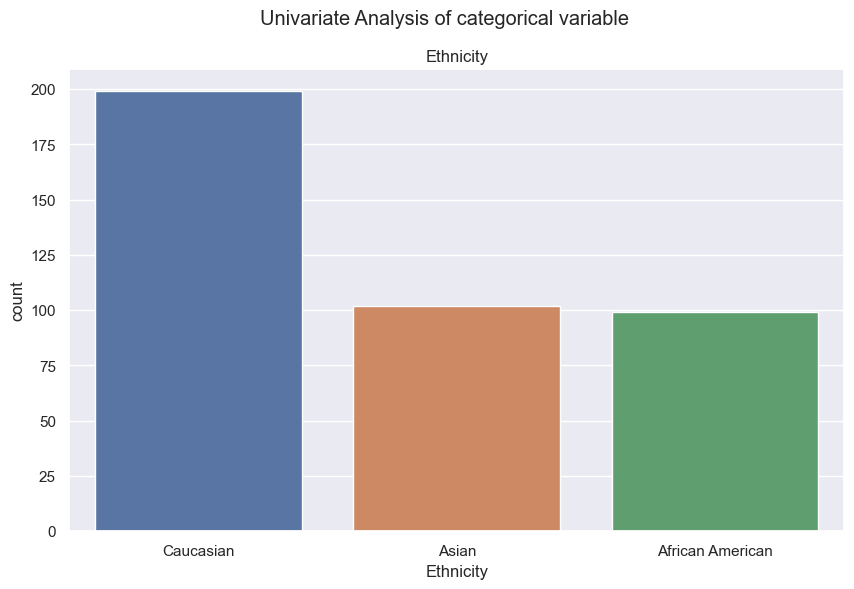

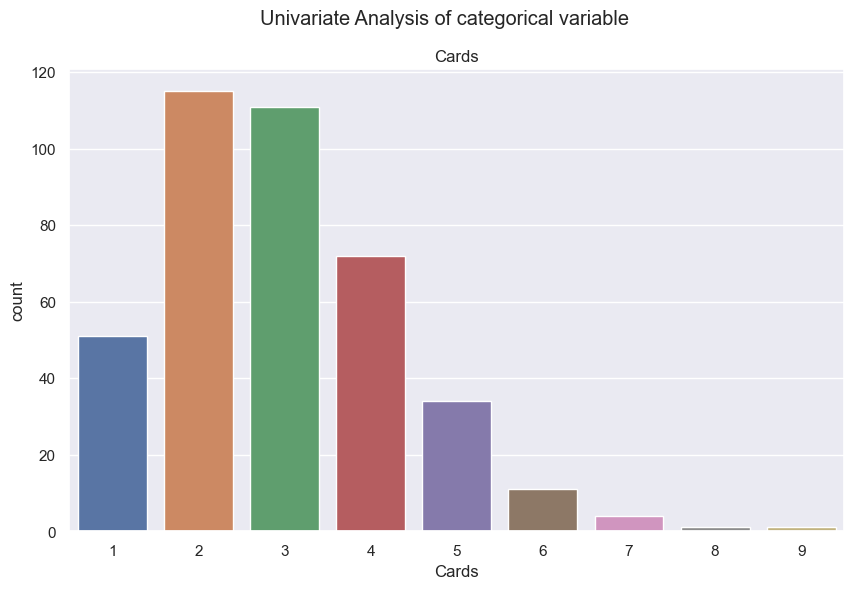

In [208]:
categorical_variable = ['Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Cards']

for i in categorical_variable:
    fig, axes = plt.subplots(1,1, figsize=(10,6))
    fig.suptitle("Univariate Analysis of categorical variable")
    sns.countplot(ax = axes,data=df,x=i)
    axes.set_title(f"{i}")

In [209]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

Important Variable
- Income
- Limit
- Age
- Balance
- Rating

Text(0.5, 1.0, 'Rating Vs Income')

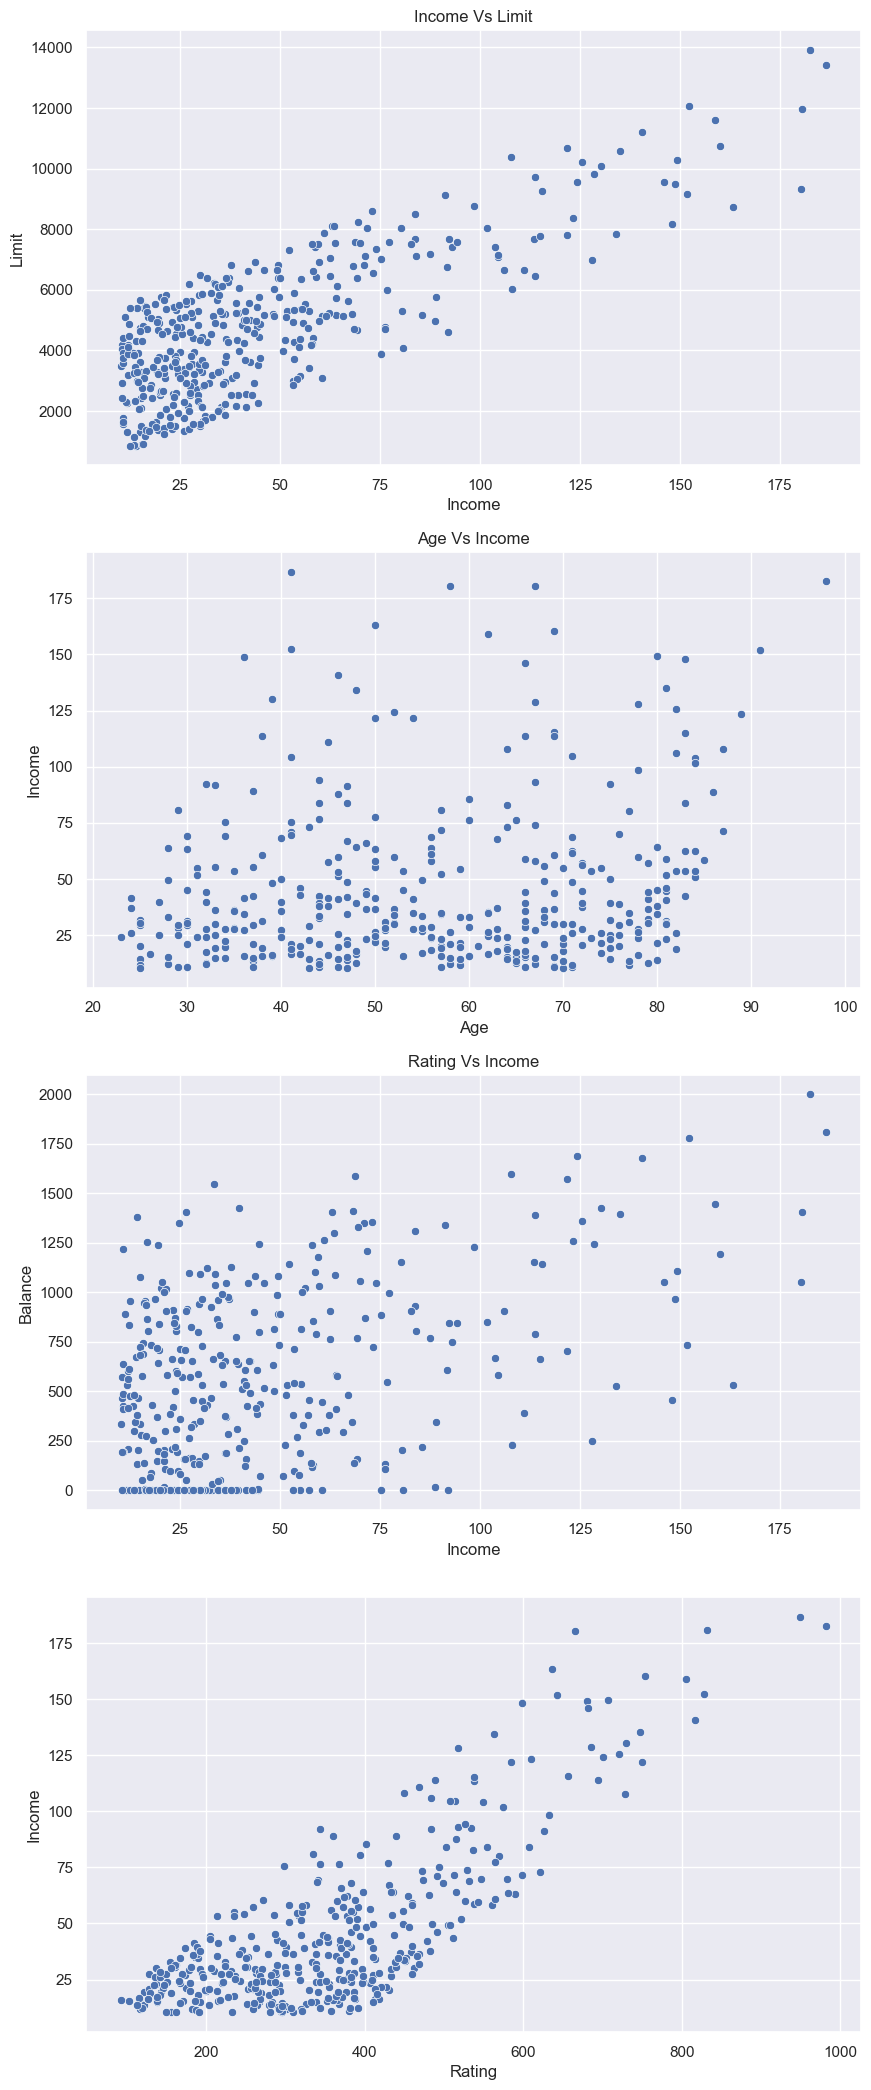

In [210]:
fig, axes = plt.subplots(4, figsize=(10,26))
sns.scatterplot(ax=axes[0],data=df,x="Income",y="Limit")
axes[0].set_title("Income Vs Limit")
sns.scatterplot(ax=axes[1],data=df,x="Age",y="Income")
axes[1].set_title("Age Vs Income")
sns.scatterplot(ax=axes[2],data=df,x="Income",y="Balance")
axes[2].set_title("Income Vs Balance")
sns.scatterplot(ax=axes[3],data=df,x="Rating",y="Income")
axes[2].set_title("Rating Vs Income")

Data Preprocessing
- Missing value treatment

In [211]:
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

- Outlier treatment

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

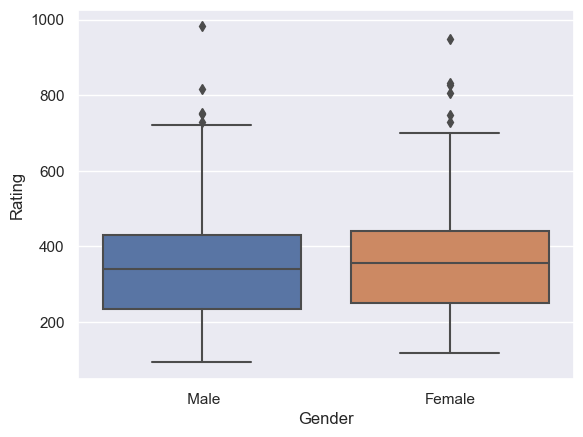

In [212]:
sns.boxplot(data=df,x="Gender",y="Rating")

<AxesSubplot:>

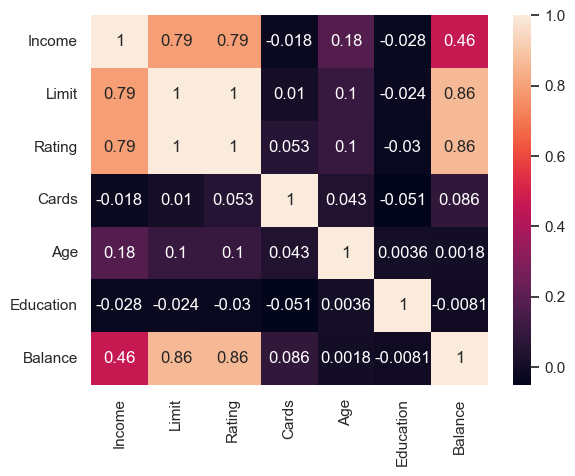

In [213]:
sns.heatmap(df.corr(),annot=True)

- Data preparation for modeling

In [214]:
df.groupby("Ethnicity")["Income"].mean()

Ethnicity
African American    47.682101
Asian               44.187833
Caucasian           44.521945
Name: Income, dtype: float64

In [215]:
df["Gender"].replace({" Male":1,"Female":0},inplace=True)
df["Student"].replace({"No":0,"Yes":1},inplace=True)
df["Married"].replace({"No":0,"Yes":1},inplace=True)
df["Ethnicity"].replace({
    "African American":0,
    "Asian":1,
    "Caucasian":2
},inplace=True)

In [216]:
x = df.drop("Rating",axis=1)
y = df["Rating"]

Model building

- Linear Regression Model

In [217]:
x_sm = sm.add_constant(x)
sm_model = sm.OLS(y,x_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     9205.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:49   Log-Likelihood:                -1489.6
No. Observations:                 400   AIC:                             3001.
Df Residuals:                     389   BIC:                             3045.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3413      4.135      7.579      0.0

- Multicollinearity check by VIF score

In [218]:
vif = pd.DataFrame()
X_t = x
vif['Features'] = X_t.columns
vif['VIF'] = np.round([variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Limit,137.36
9,Balance,33.73
0,Income,19.56
4,Education,14.66
3,Age,10.83
2,Cards,5.14
8,Ethnicity,3.14
7,Married,2.59
6,Student,2.34
5,Gender,1.90


In [219]:
x1 = x.drop("Education",axis=1)
x1_sm = sm.add_constant(x1)
sm1_model = sm.OLS(y,x1_sm).fit()
print(sm1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:49   Log-Likelihood:                -1490.7
No. Observations:                 400   AIC:                             3001.
Df Residuals:                     390   BIC:                             3041.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2526      3.558      7.940      0.0

In [220]:
x2 = x1.drop("Age",axis=1)
x2_sm = sm.add_constant(x2)
sm2_model = sm.OLS(y,x2_sm).fit()
print(sm2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:57:49   Log-Likelihood:                -1490.8
No. Observations:                 400   AIC:                             3000.
Df Residuals:                     391   BIC:                             3036.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9082      3.277      8.823      0.0

In [222]:
x3 = x2.drop("Balance",axis=1)
x3_sm = sm.add_constant(x3)
sm3_model = sm.OLS(y,x3_sm).fit()
print(sm3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.300e+04
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:58:13   Log-Likelihood:                -1493.4
No. Observations:                 400   AIC:                             3003.
Df Residuals:                     392   BIC:                             3035.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9547      1.980     11.592      0.0

In [223]:
vif = pd.DataFrame()
X_t = x3
vif['Features'] = X_t.columns
vif['VIF'] = np.round([variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Limit,11.54
0,Income,7.03
2,Cards,3.97
6,Ethnicity,2.82
5,Married,2.37
3,Gender,1.81
4,Student,1.10


In [ ]:
standard = StandardScaler()
x = standard.fit_transform(df.drop("Rating",axis=1))
y = standard.fit_transform(df["Rating"].values.reshape(-1,1))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,shuffle=True)

In [ ]:
model = LinearRegression()
model.fit(x,y)
y_hat = np.dot(x,model.coef_.T) + model.intercept_
error = y_hat - y
error.mean()

LinearRegression()

<AxesSubplot:ylabel='Count'>

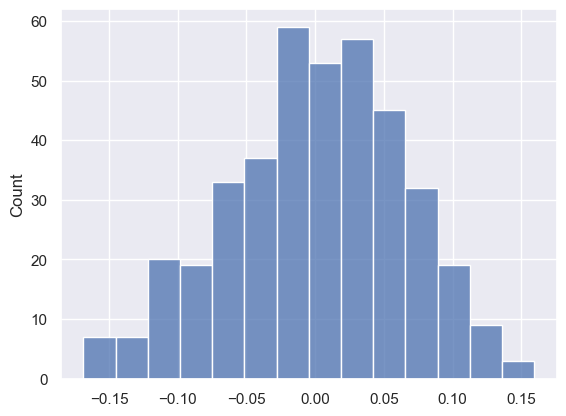

In [228]:
sns.histplot(error.squeeze())

c:\Users\revan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs Residuals')

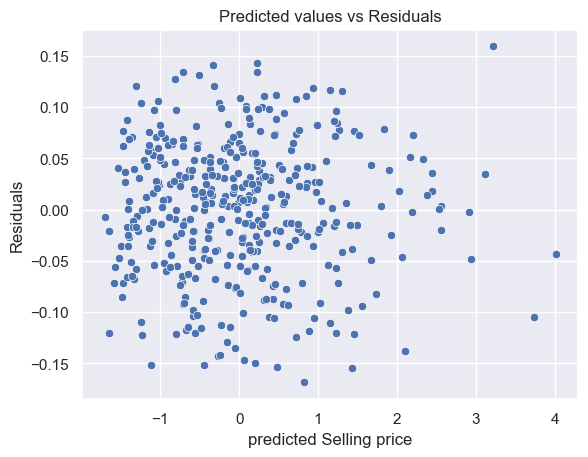

In [ ]:
sns.scatterplot(y_hat.squeeze(),error.squeeze())
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

<AxesSubplot:ylabel='Density'>

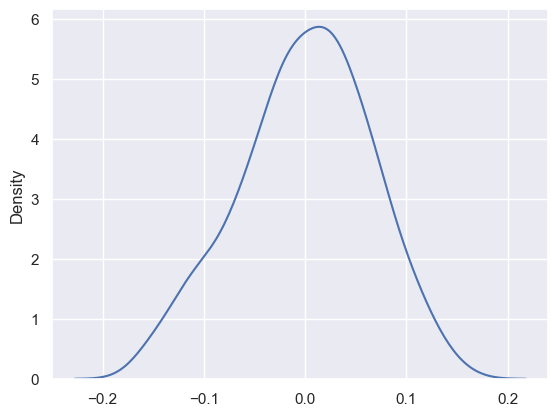

In [ ]:
sns.kdeplot(error.squeeze())

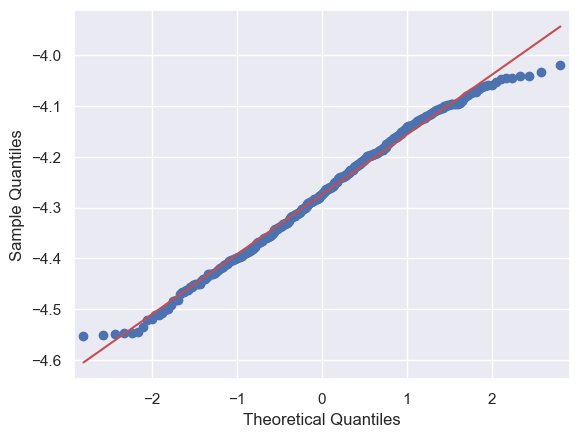

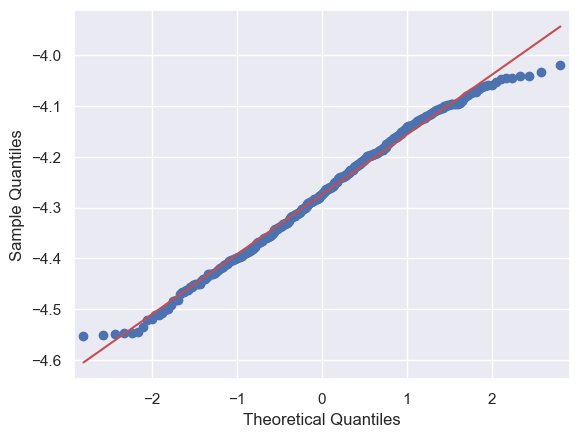

In [231]:
qqplot(stats.boxcox(np.square(error.squeeze())/len(error.squeeze()))[0],line="s")